In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [182]:
college = pd.read_csv("College.csv")

In [183]:
#Seeing the basic info on the College Application Dataset. Interesting set of columns and variables for the data.
college.describe()
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [184]:
#Checking the titles and names of the columns.
col=college.columns
col

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [185]:
apps = college['Apps']
apps.describe()

count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64

(array([638.,  92.,  31.,  11.,   4.,   0.,   0.,   0.,   0.,   1.]),
 array([   81. ,  4882.3,  9683.6, 14484.9, 19286.2, 24087.5, 28888.8,
        33690.1, 38491.4, 43292.7, 48094. ]),
 <BarContainer object of 10 artists>)

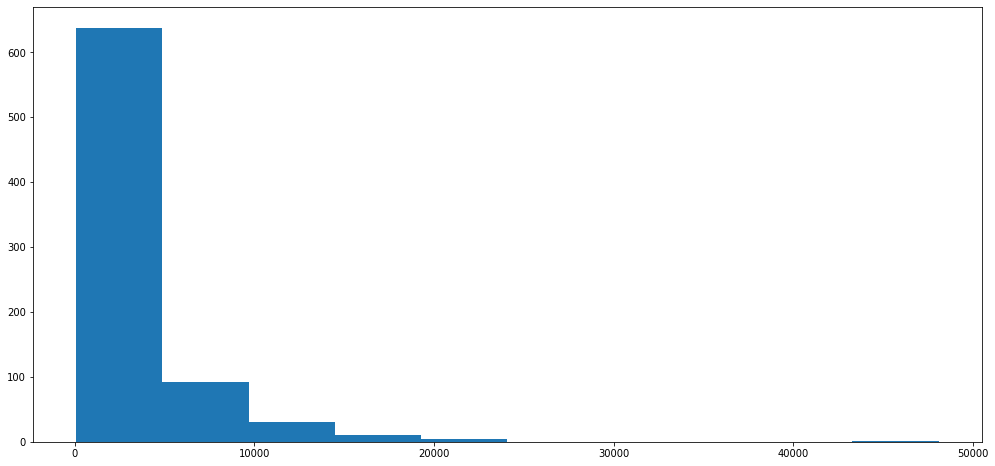

In [186]:
#The data is quite skewed to the right, will need to take the log of it later.
plt.figure(figsize =(17,8))
plt.hist(apps)

In [187]:
apps= np.log2(apps) 
apps.describe()

count    777.000000
mean      10.714307
std        1.549003
min        6.339850
25%        9.599913
50%       10.605480
75%       11.823367
max       15.553569
Name: Apps, dtype: float64

In [188]:
#Checking the correlation numbers. 
college.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


In [189]:
college.sort_values(by = ['Apps'], ascending = False).head(10)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
483,Rutgers at New Brunswick,No,48094,26330,4520,36,79,21401,3712,7410,4748,690,2009,90,95,19.5,19,10474,77
461,Purdue University at West Lafayette,No,21804,18744,5874,29,60,26213,4065,9556,3990,570,1060,86,86,18.2,15,8604,67
59,Boston University,Yes,20192,13007,3810,45,80,14971,3113,18420,6810,475,1025,80,81,11.9,16,16836,72
605,University of California at Berkeley,No,19873,8252,3215,95,100,19532,2061,11648,6246,636,1933,93,97,15.8,10,13919,78
445,Pennsylvania State Univ. Main Campus,No,19315,10344,3450,48,93,28938,2025,10645,4060,512,2394,77,96,18.1,19,8992,63
637,University of Michigan at Ann Arbor,No,19152,12940,4893,66,92,22045,1339,15732,4659,476,1600,90,98,11.5,26,14847,87
366,Michigan State University,No,18114,15096,6180,23,57,26640,4120,10658,3734,504,600,93,95,14.0,9,10520,71
274,Indiana University at Bloomington,No,16587,13243,5873,25,72,24763,2717,9766,3990,600,2000,77,88,21.3,24,8686,68
693,University of Virginia,No,15849,5384,2678,74,95,11278,114,12212,3792,500,1000,90,92,9.5,22,13597,95
713,Virginia Tech,No,15712,11719,4277,29,53,18511,604,10260,3176,740,2200,85,89,13.8,20,8944,73


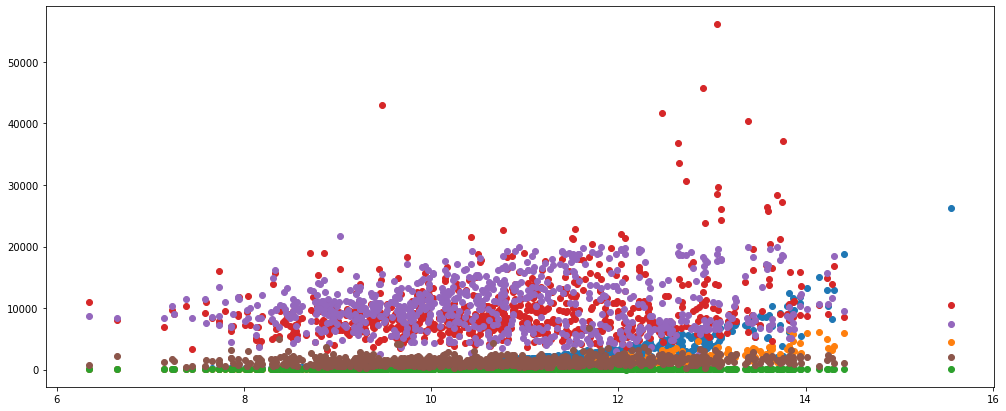

In [190]:
#Checking the scatter plots. Interestingly enough, you can see all the plots together. With large data, the dots are better than lines.
plt.figure(figsize = (17,7))
plt.plot(apps, college['Accept'], 'o')
plt.plot(apps, college['Enroll'], 'o')
plt.plot(apps, college['Grad.Rate'], 'o')
plt.plot(apps, college['Expend'], 'o')
plt.plot(apps, college['Outstate'], 'o')
plt.plot(apps, college['Personal'], 'o')

In [191]:
college[college.columns[0:3]]

,Unnamed: 0,Private,Apps
0,Abilene Christian University,Yes,1660
1,Adelphi University,Yes,2186
2,Adrian College,Yes,1428
3,Agnes Scott College,Yes,417
4,Alaska Pacific University,Yes,193
...,...,...,...
772,Worcester State College,No,2197
773,Xavier University,Yes,1959
774,Xavier University of Louisiana,Yes,2097
775,Yale University,Yes,10705


In [192]:
#Splitting the data into training and testing.
train, test =  train_test_split(college, test_size=0.2, random_state=1)

In [193]:
train.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,621.000000,621.000000,621.000000,621.000000,621.000000,621.00000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000
mean,3023.523349,2016.053140,770.462158,27.737520,56.133655,3686.84219,838.520129,10431.714976,4364.032206,548.122383,1339.006441,73.119163,80.210950,14.107085,22.599034,9662.413849,65.523349
std,3894.432798,2411.662308,879.422369,17.774402,19.675099,4693.83039,1321.210866,4008.834711,1077.099820,163.442447,672.321049,15.976151,14.263724,3.924865,12.123368,5333.598650,17.118605
min,81.000000,72.000000,51.000000,1.000000,9.000000,139.00000,1.000000,2580.000000,1920.000000,96.000000,250.000000,8.000000,24.000000,2.500000,1.000000,3186.000000,10.000000
25%,785.000000,614.000000,247.000000,16.000000,41.000000,995.00000,95.000000,7260.000000,3600.000000,450.000000,870.000000,63.000000,71.000000,11.500000,13.000000,6744.000000,54.000000
50%,1603.000000,1151.000000,438.000000,23.000000,54.000000,1763.00000,352.000000,9996.000000,4200.000000,512.000000,1200.000000,75.000000,83.000000,13.600000,21.000000,8377.000000,65.000000
75%,3708.000000,2492.000000,904.000000,35.000000,69.000000,4265.00000,993.000000,12750.000000,5045.000000,600.000000,1675.000000,86.000000,92.000000,16.400000,31.000000,10625.000000,78.000000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.00000,10221.000000,20100.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,60.000000,56233.000000,118.000000


In [194]:
#This project/notebook is done to experiment with feature selection using Lasso, Ridge. 
#I am including all the columns to see how it will turn out.

train.columns[3:19]

Index(['Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [195]:
x_train = train[train.columns[3:19]]
y_train = train[['Apps']]
y_train = np.log2(y_train) 

x_test = test[test.columns[3:19]]
y_test = test[['Apps']]
y_test = np.log2(y_test)

In [196]:
#As an initial regression model, I always run linear regression first to get a feel for the range of the error numbers.
model.fit(x_train, y_train)
model.predict(x_test)

pred = model.predict(x_test)
y_lin_pred = model.predict(x_test)

print('Score: %.3f' % model.score(x_train, y_train))
print('Mean squared error: %.3f' % mean_squared_error(y_test, y_lin_pred))
print('R2 Score: %.3f' % r2_score(y_test, y_lin_pred))

Score: 0.757
Mean squared error: 0.729
R2 Score: 0.719


In [197]:
#Lasso has built-in feature selection, using this algorithm to test out the prediction.
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.01, max_iter = 100000, normalize = True)
model_lasso.fit(x_train, y_train) 
pred_train_lasso= model_lasso.predict(x_train)

pred_test_lasso= model_lasso.predict(x_test)
print('Mean squared error: %.3f' % np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print('R2 Score: %.3f' % r2_score(y_test, pred_test_lasso))

Mean squared error: 0.929
R2 Score: 0.667


In [198]:
#Ridge is usually paried with Lasso, the numbers are fairly similara depending on the parameters.
from sklearn.linear_model import Ridge
model_Ridge = Ridge(alpha=0.01, normalize = True)
model_Ridge.fit(x_train, y_train) 
pred_train_ridge= model_Ridge.predict(x_train)

pred_test_Ridge= model_Ridge.predict(x_test)
print('Mean squared error: %.3f' % np.sqrt(mean_squared_error(y_test, pred_test_Ridge)))
print('R2 Score: %.3f' % r2_score(y_test, pred_test_Ridge))

Mean squared error: 0.848
R2 Score: 0.723


In [199]:
#Using KNN neighbors to compare with the other models.
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors = 50, weights = 'uniform')
knn.fit(x_train, y_train)
y_knn = knn.predict(x_test)

print('RMSE: %.3f' % mean_squared_error(y_test, y_knn))
print('R2 Score: %.5f' % r2_score(y_test, y_knn))

RMSE: 0.627
R2 Score: 0.75800
